In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("credit_risk.csv")

In [3]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [6]:
df[df['Emp_length'].isnull()]  ## It is randomly missing data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
105,105,22,12600,MORTGAGE,NaN,PERSONAL,2000,5.42,1,0.16,N,4
222,222,24,185000,MORTGAGE,NaN,EDUCATION,35000,12.42,0,0.19,N,2
379,379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,3900,NaN,1,0.23,N,3
407,407,25,52000,RENT,NaN,PERSONAL,24000,10.74,1,0.46,N,2
408,408,22,17352,MORTGAGE,NaN,EDUCATION,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,32285,38,12000,OWN,NaN,EDUCATION,4800,7.29,1,0.40,N,12
32328,32328,51,18408,RENT,NaN,PERSONAL,1000,14.65,1,0.05,Y,20
32360,32360,70,39996,RENT,NaN,MEDICAL,3600,15.23,0,0.09,Y,19
32453,32453,56,32400,RENT,NaN,MEDICAL,8575,7.51,0,0.26,N,18


In [7]:
df['Emp_length_median']=df['Emp_length'].fillna(df['Emp_length'].median())

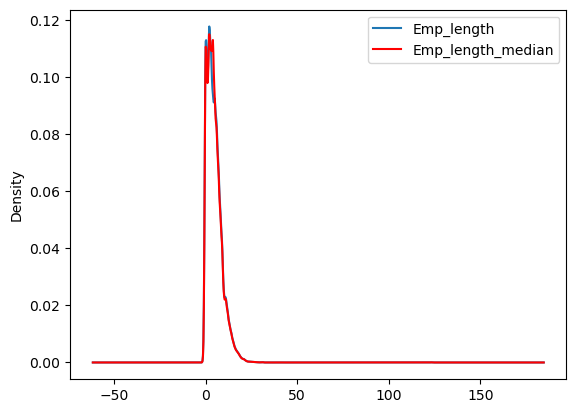

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Emp_length'].plot(kind='kde',ax=ax)
df['Emp_length_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [9]:
df=df.drop('Emp_length',axis=1)

In [10]:
df[df['Rate'].isnull()]   ## Missing completley random

,Id,Age,Income,Home,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Emp_length_median
39,39,23,71500,RENT,DEBTCONSOLIDATION,30000,NaN,1,0.42,N,4,3.0
50,50,24,78000,RENT,DEBTCONSOLIDATION,30000,NaN,1,0.38,Y,4,4.0
57,57,23,277000,OWN,PERSONAL,35000,NaN,0,0.13,N,4,3.0
59,59,24,12000,OWN,VENTURE,1750,NaN,0,0.15,Y,3,2.0
62,62,26,263000,MORTGAGE,EDUCATION,10000,NaN,1,0.04,N,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,32547,53,4888,OWN,VENTURE,1400,NaN,1,0.29,Y,28,0.0
32552,32552,65,45900,RENT,EDUCATION,10000,NaN,0,0.22,Y,19,2.0
32553,32553,54,20000,RENT,MEDICAL,5000,NaN,0,0.25,N,28,2.0
32569,32569,51,60000,MORTGAGE,PERSONAL,7500,NaN,0,0.13,N,23,1.0


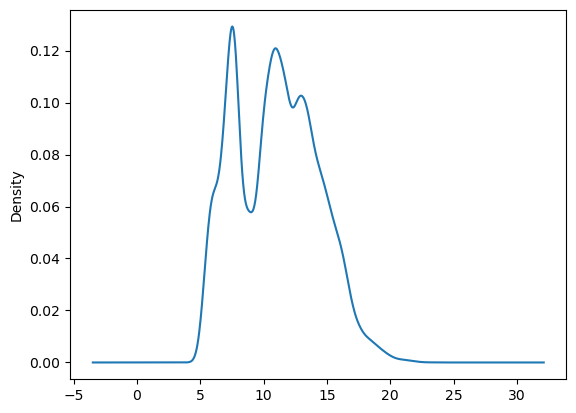

In [11]:
df['Rate'].plot(kind='kde')
plt.show()          

In [12]:
df['Rate_median']=df['Rate'].fillna(df['Rate'].median())

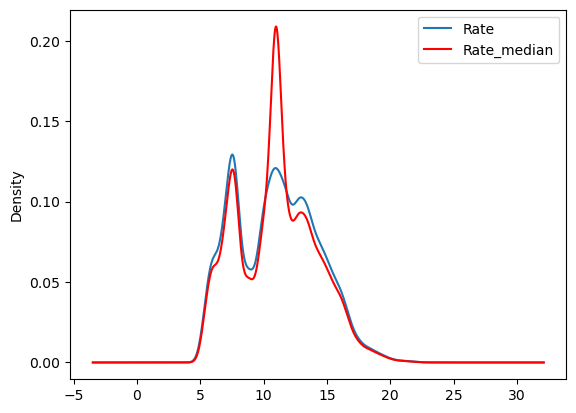

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Rate'].plot(kind='kde',ax=ax)
df['Rate_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [14]:
df=df.drop('Rate',axis=1)

In [15]:
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Intent               0
Amount               0
Status               0
Percent_income       0
Default              0
Cred_length          0
Emp_length_median    0
Rate_median          0
dtype: int64

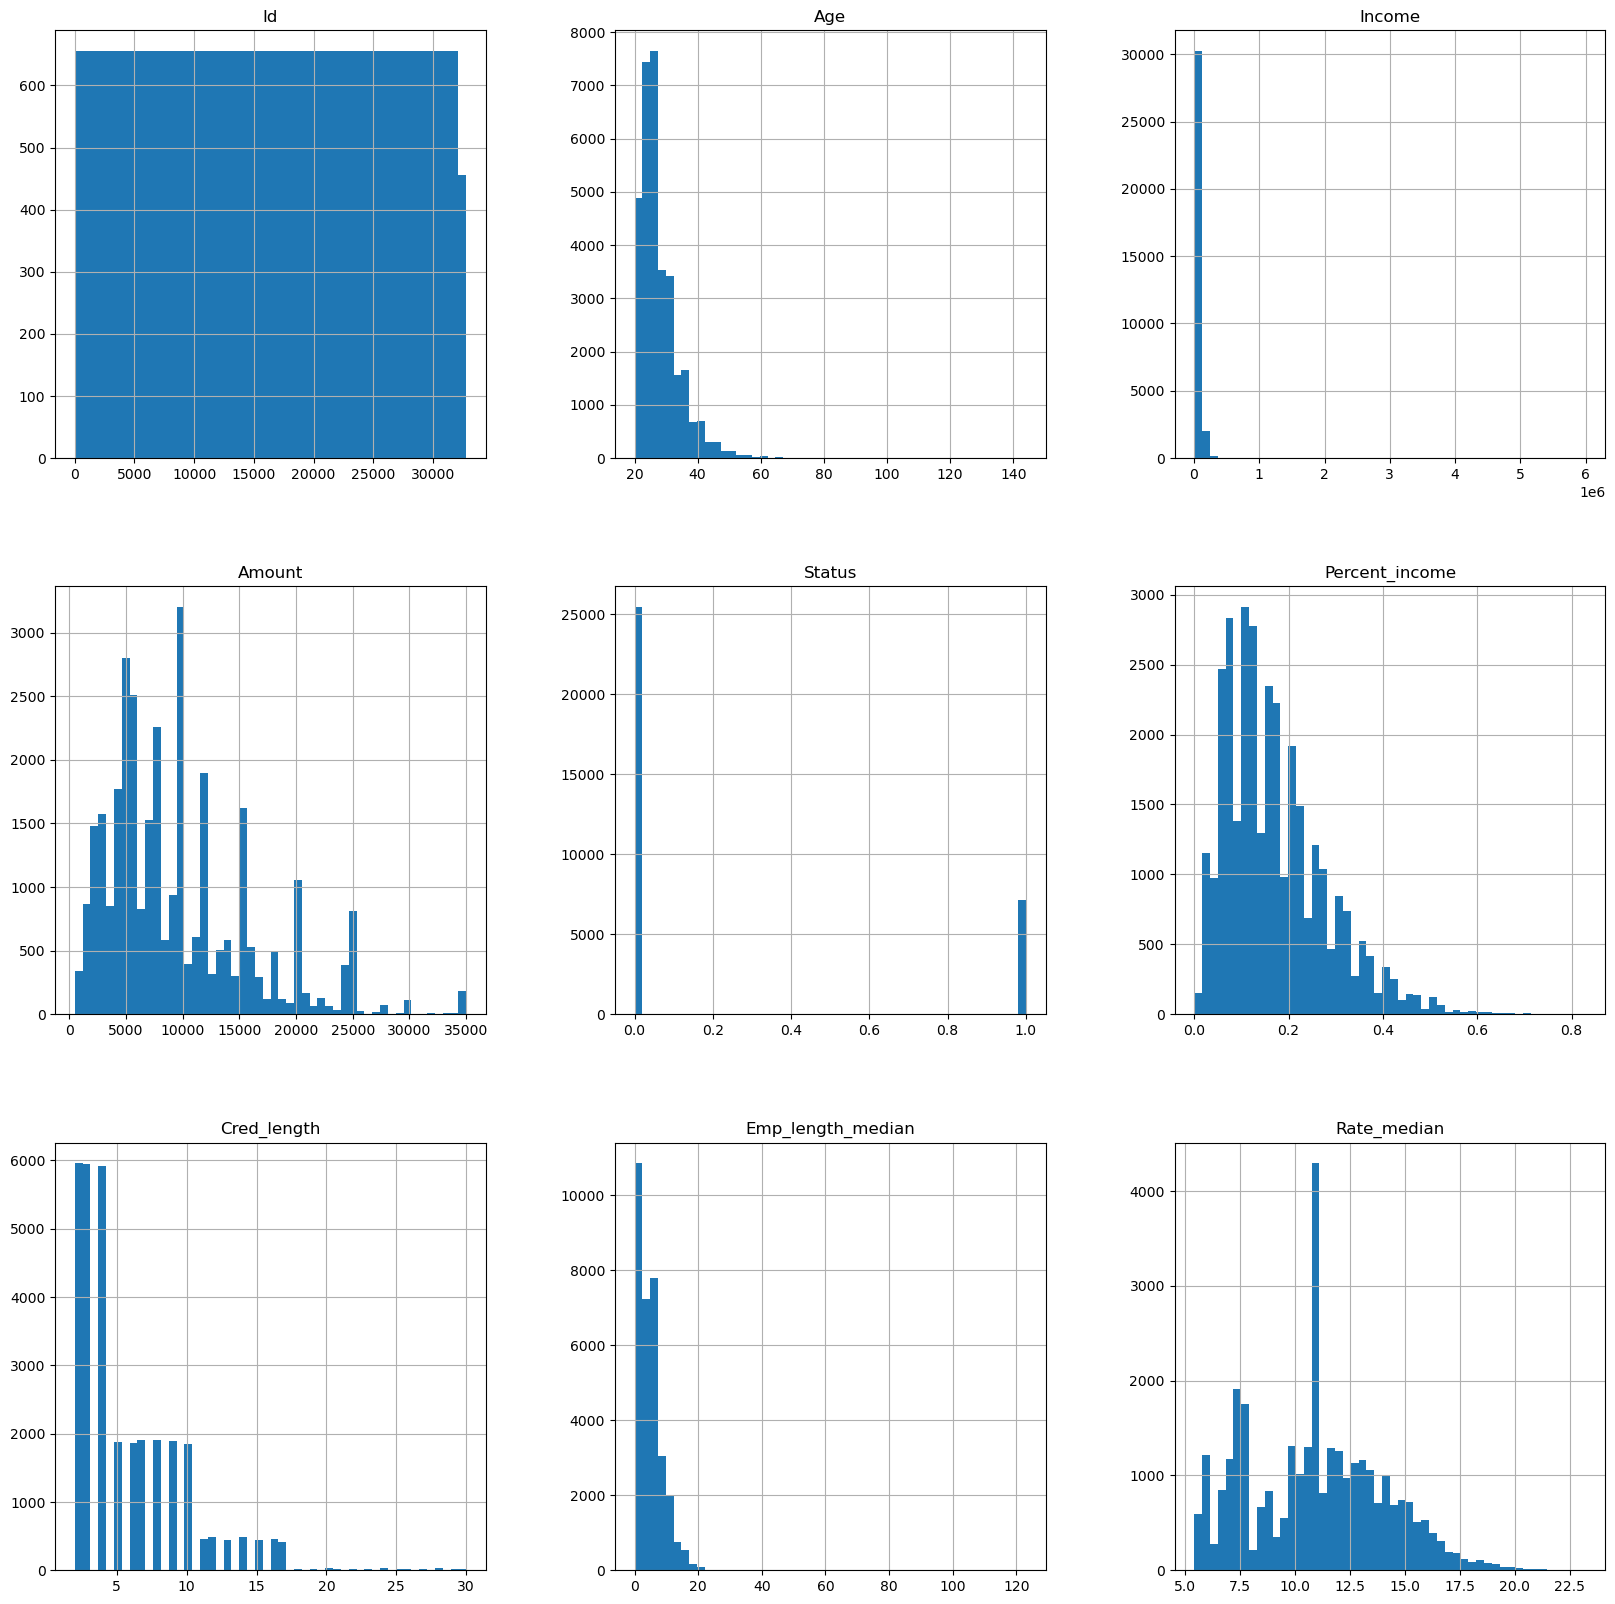

In [16]:
df.hist(figsize=(20,20),bins=50)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40'),
  Text(21, 0, '41'),
  Text(22, 0, '42'),
  Text(23, 0, '43'),
  Text(24, 0, '44'),
  Text(25, 0, '45'),
  Text(26, 0, '46'),
  Text(27, 0, '47'),
  Text(28, 0, '48'),
  Text(29, 0, '49'),
  Text(30, 0, '50'),
  Text(31, 0, '51'),
  Text(32, 0, '52'),
  Text(33, 0, '53'),
  Text(34, 0, '54'),
  Text(35

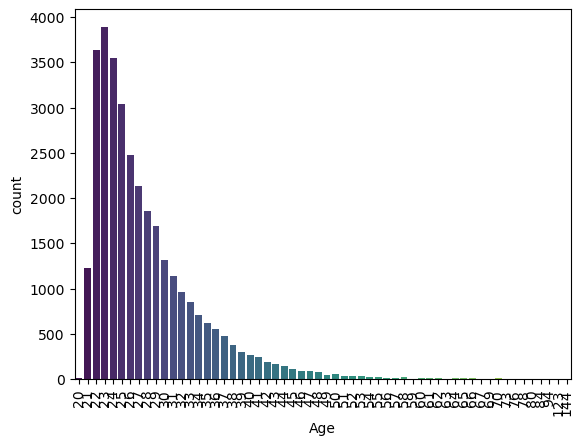

In [17]:
sns.countplot(data=df, x='Age', palette='viridis')
plt.xticks(rotation=90)

In [18]:
a=df.groupby(['Default','Age'])['Id'].count().reset_index()

<Axes: xlabel='Age', ylabel='Id'>

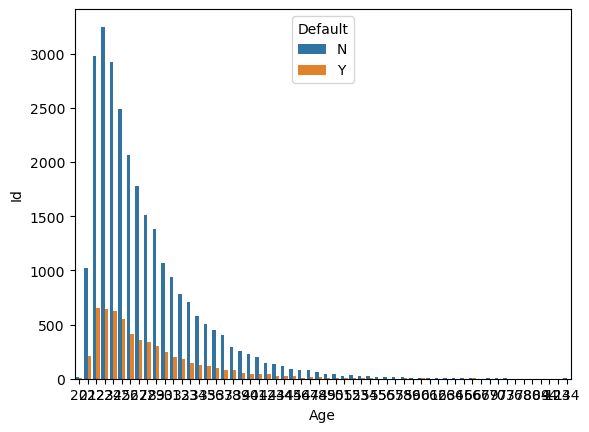

In [19]:
sns.barplot(data=a,x='Age',y='Id',hue='Default')

In [20]:
## Lets us find is there any relationships between finanacial status of the person and the credit trust worthiness


In [21]:
df.head()

,Id,Age,Income,Home,Intent,Amount,Status,Percent_income,Default,Cred_length,Emp_length_median,Rate_median
0,0,22,59000,RENT,PERSONAL,35000,1,0.59,Y,3,123.0,16.02
1,1,21,9600,OWN,EDUCATION,1000,0,0.10,N,2,5.0,11.14
2,2,25,9600,MORTGAGE,MEDICAL,5500,1,0.57,N,3,1.0,12.87
3,3,23,65500,RENT,MEDICAL,35000,1,0.53,N,2,4.0,15.23
4,4,24,54400,RENT,MEDICAL,35000,1,0.55,Y,4,8.0,14.27


In [22]:
df.groupby(['Percent_income','Default'])['Id'].count()

Percent_income  Default
0.00            N            8
                Y            1
0.01            N          117
                Y           22
0.02            N          313
                          ... 
0.72            N            1
0.76            N            1
0.77            N            2
0.78            N            1
0.83            N            1
Name: Id, Length: 145, dtype: int64

In [23]:
sdf=df[df['Percent_income']>0.28]

In [24]:
sdf.groupby(['Default','Status'])['Id'].count().reset_index()

,Default,Status,Id
0,N,0,1556
1,N,1,2256
2,Y,0,287
3,Y,1,652


<Axes: xlabel='Default', ylabel='Id'>

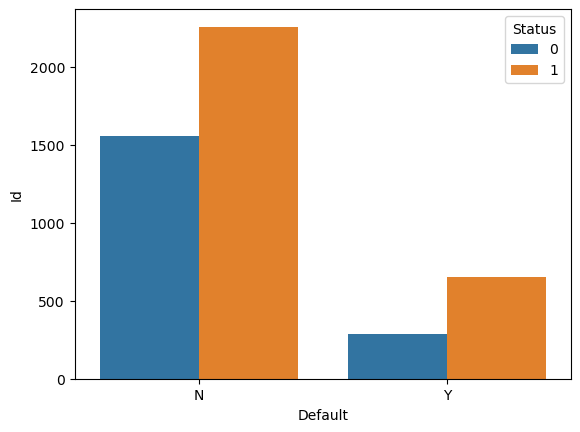

In [25]:
sns.barplot(data=sdf.groupby(['Default','Status'])['Id'].count().reset_index(),x='Default',y='Id',hue='Status')

In [26]:
sdf1=df[df['Percent_income']<0.28]

In [27]:
sdf1.groupby(['Default','Status'])['Id'].count().reset_index()

,Default,Status,Id
0,N,0,20048
1,N,1,2610
2,Y,0,3237
3,Y,1,1459


<Axes: xlabel='Default', ylabel='Id'>

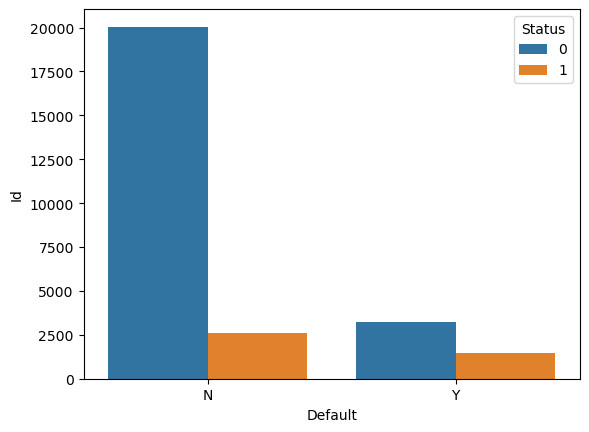

In [28]:
sns.barplot(data=sdf1.groupby(['Default','Status'])['Id'].count().reset_index(),x='Default',y='Id',hue='Status')

In [29]:
df['Status'].value_counts()

0    25473
1     7108
Name: Status, dtype: int64

In [30]:
## Here the target variable is imbalanced and the if we observe that the whose percentage of income for loan repayment 
## is less than 28% are not approved of loan may it is because of the home type and type of collateral they put for loan and the
## the people who are more than 28% spending for loan repayement are getting more loans 

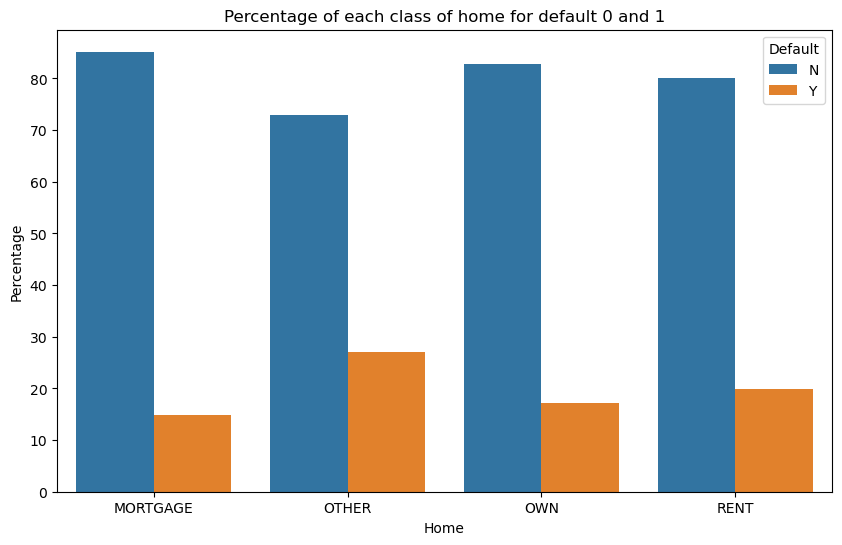

In [31]:
# Grouping the data by 'Home' and 'Default' and calculating counts
grouped_data = df.groupby(['Home', 'Default'])['Id'].count().reset_index()

# Calculating the total count of entries for each Home status
total_counts = grouped_data.groupby('Home')['Id'].sum()

# Calculating the percentage of each class of 'Home' for default 0 and 1 separately
grouped_data['Percentage'] = grouped_data.apply(lambda row: (row['Id'] / total_counts[row['Home']]) * 100, axis=1)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Home', y='Percentage', hue='Default')
plt.title('Percentage of each class of home for default 0 and 1')
plt.xlabel('Home')
plt.ylabel('Percentage')
plt.show()


In [32]:
total_counts

Home
MORTGAGE    13444
OTHER         107
OWN          2584
RENT        16446
Name: Id, dtype: int64

In [33]:
grouped_data

,Home,Default,Id,Percentage
0,MORTGAGE,N,11450,85.168105
1,MORTGAGE,Y,1994,14.831895
2,OTHER,N,78,72.897196
3,OTHER,Y,29,27.102804
4,OWN,N,2140,82.817337
5,OWN,Y,444,17.182663
6,RENT,N,13168,80.068102
7,RENT,Y,3278,19.931898


In [34]:
## IF we observe the people who are in mortgage are paying back loans successfully and they followed by own and rent 

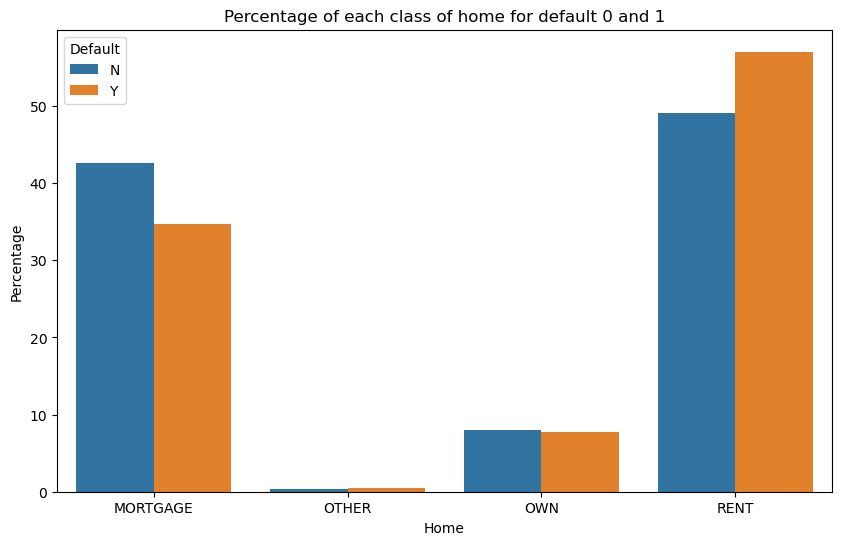

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by 'Home' and 'Default' and calculating counts
grouped_data = df.groupby(['Home', 'Default'])['Id'].count().reset_index()

# Calculating the total count of entries for each default status
total_counts = grouped_data.groupby('Default')['Id'].sum()

# Calculating the percentage of each class of 'Home' for default 0 and 1 separately
grouped_data['Percentage'] = grouped_data.apply(lambda row: (row['Id'] / total_counts[row['Default']]) * 100, axis=1)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Home', y='Percentage', hue='Default')
plt.title('Percentage of each class of home for default 0 and 1')
plt.xlabel('Home')
plt.ylabel('Percentage')
plt.show()

In [36]:
## Here This plot is giving us the how the various people are paying their loans in various department among all means how default 
## is spread across various types of people having various property mortagage Here people living rental house are paying off loans
## perfectly as well as most of the people are not paying loans due to their financial status.The people with own also also almost
## 50% paying and 50% are not paying .But when coming to the mortgage the more people are paying loans when compared with not 
## paying loans

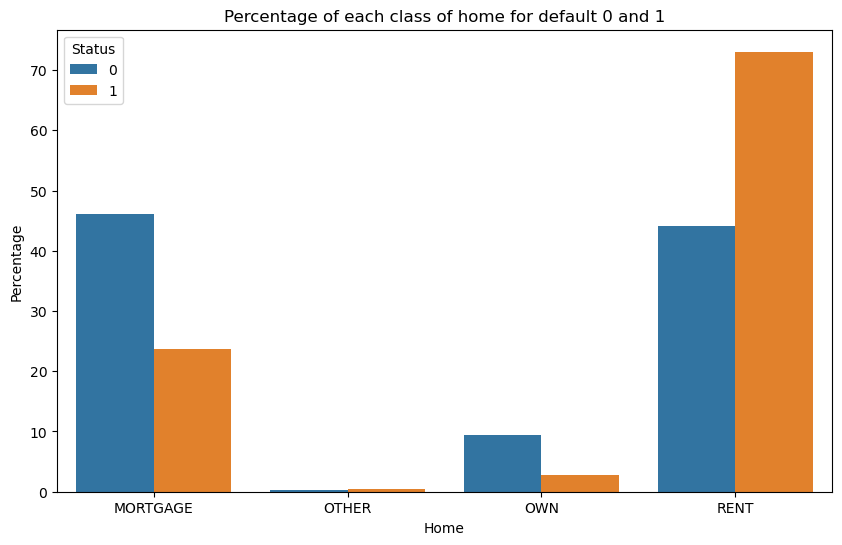

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by 'Home' and 'Default' and calculating counts
grouped_data = df.groupby(['Home', 'Status'])['Id'].count().reset_index()

# Calculating the total count of entries for each default status
total_counts = grouped_data.groupby('Status')['Id'].sum()

# Calculating the percentage of each class of 'Home' for default 0 and 1 separately
grouped_data['Percentage'] = grouped_data.apply(lambda row: (row['Id'] / total_counts[row['Status']]) * 100, axis=1)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Home', y='Percentage', hue='Status')
plt.title('Percentage of each class of home for default 0 and 1')
plt.xlabel('Home')
plt.ylabel('Percentage')
plt.show()

In [38]:
grouped_data

,Home,Status,Id,Percentage
0,MORTGAGE,0,11754,46.142975
1,MORTGAGE,1,1690,23.776027
2,OTHER,0,74,0.290504
3,OTHER,1,33,0.464266
4,OWN,0,2391,9.386409
5,OWN,1,193,2.715250
6,RENT,0,11254,44.180112
7,RENT,1,5192,73.044457


In [39]:
## It is also same as above plot but I plotted this based on the loan approval or not the people with more approval is another
## time also rent here more than 70% and it followed by mortagage and the loan not approved also more in mortagage and then  rent

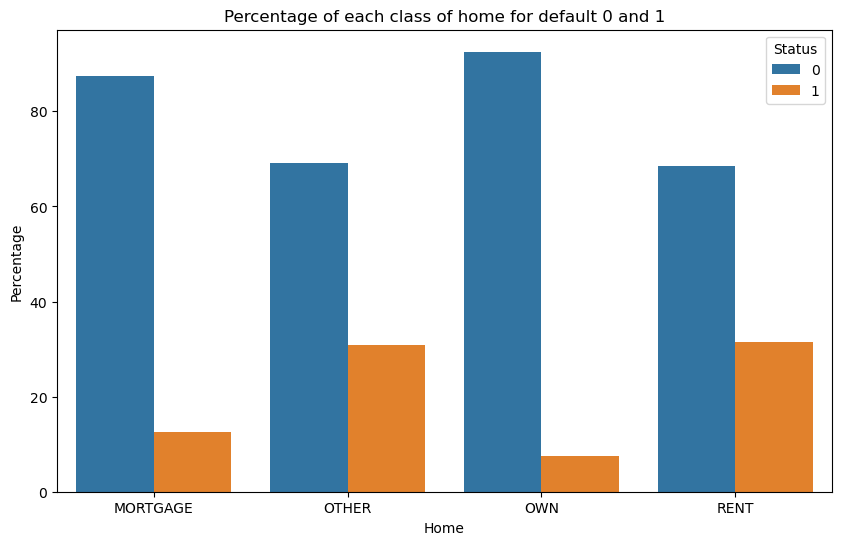

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by 'Home' and 'Default' and calculating counts
grouped_data = df.groupby(['Home', 'Status'])['Id'].count().reset_index()

# Calculating the total count of entries for each default status
total_counts = grouped_data.groupby('Home')['Id'].sum()

# Calculating the percentage of each class of 'Home' for default 0 and 1 separately
grouped_data['Percentage'] = grouped_data.apply(lambda row: (row['Id'] / total_counts[row['Home']]) * 100, axis=1)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Home', y='Percentage', hue='Status')
plt.title('Percentage of each class of home for default 0 and 1')
plt.xlabel('Home')
plt.ylabel('Percentage')
plt.show()

In [41]:
## This plot is all about various percentages in each class itself here in every class the approval rate is less than 
## not approval rate rental and other are good at approval rate of loan

In [42]:
df.head()

,Id,Age,Income,Home,Intent,Amount,Status,Percent_income,Default,Cred_length,Emp_length_median,Rate_median
0,0,22,59000,RENT,PERSONAL,35000,1,0.59,Y,3,123.0,16.02
1,1,21,9600,OWN,EDUCATION,1000,0,0.10,N,2,5.0,11.14
2,2,25,9600,MORTGAGE,MEDICAL,5500,1,0.57,N,3,1.0,12.87
3,3,23,65500,RENT,MEDICAL,35000,1,0.53,N,2,4.0,15.23
4,4,24,54400,RENT,MEDICAL,35000,1,0.55,Y,4,8.0,14.27


## Feature Engineering and Feature Scaling

In [43]:
df.head()

,Id,Age,Income,Home,Intent,Amount,Status,Percent_income,Default,Cred_length,Emp_length_median,Rate_median
0,0,22,59000,RENT,PERSONAL,35000,1,0.59,Y,3,123.0,16.02
1,1,21,9600,OWN,EDUCATION,1000,0,0.10,N,2,5.0,11.14
2,2,25,9600,MORTGAGE,MEDICAL,5500,1,0.57,N,3,1.0,12.87
3,3,23,65500,RENT,MEDICAL,35000,1,0.53,N,2,4.0,15.23
4,4,24,54400,RENT,MEDICAL,35000,1,0.55,Y,4,8.0,14.27


In [44]:
## As the ordinality in the features are missing so let us perform one hot encoding 

In [45]:
en_df=pd.get_dummies(df['Home'],drop_first=True)

In [46]:
df=pd.concat([df,en_df],axis=1)

In [47]:
df

,Id,Age,Income,Home,Intent,Amount,Status,Percent_income,Default,Cred_length,Emp_length_median,Rate_median,OTHER,OWN,RENT
0,0,22,59000,RENT,PERSONAL,35000,1,0.59,Y,3,123.0,16.02,0,0,1
1,1,21,9600,OWN,EDUCATION,1000,0,0.10,N,2,5.0,11.14,0,1,0
2,2,25,9600,MORTGAGE,MEDICAL,5500,1,0.57,N,3,1.0,12.87,0,0,0
3,3,23,65500,RENT,MEDICAL,35000,1,0.53,N,2,4.0,15.23,0,0,1
4,4,24,54400,RENT,MEDICAL,35000,1,0.55,Y,4,8.0,14.27,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,PERSONAL,5800,0,0.11,N,30,1.0,13.16,0,0,0
32577,32577,54,120000,MORTGAGE,PERSONAL,17625,0,0.15,N,19,4.0,7.49,0,0,0
32578,32578,65,76000,RENT,HOMEIMPROVEMENT,35000,1,0.46,N,28,3.0,10.99,0,0,1
32579,32579,56,150000,MORTGAGE,PERSONAL,15000,0,0.10,N,26,5.0,11.48,0,0,0


In [48]:
en_df=pd.get_dummies(df['Intent'],drop_first=True)

In [49]:
df=pd.concat([df,en_df],axis=1)

In [50]:
df['Default']=np.where(df['Default']=='Y',0,1)

In [51]:
df=df.drop(['Home','Intent'],axis=1)

In [52]:
df.head()

,Id,Age,Income,Amount,Status,Percent_income,Default,Cred_length,Emp_length_median,Rate_median,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0,22,59000,35000,1,0.59,0,3,123.0,16.02,0,0,1,0,0,0,1,0
1,1,21,9600,1000,0,0.10,1,2,5.0,11.14,0,1,0,1,0,0,0,0
2,2,25,9600,5500,1,0.57,1,3,1.0,12.87,0,0,0,0,0,1,0,0
3,3,23,65500,35000,1,0.53,1,2,4.0,15.23,0,0,1,0,0,1,0,0
4,4,24,54400,35000,1,0.55,0,4,8.0,14.27,0,0,1,0,0,1,0,0


In [53]:
## Our target variable is Status 
x=df.drop('Status',axis=1)
y=df.drop(x,axis=1)

In [54]:
x.head()

,Id,Age,Income,Amount,Percent_income,Default,Cred_length,Emp_length_median,Rate_median,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0,22,59000,35000,0.59,0,3,123.0,16.02,0,0,1,0,0,0,1,0
1,1,21,9600,1000,0.10,1,2,5.0,11.14,0,1,0,1,0,0,0,0
2,2,25,9600,5500,0.57,1,3,1.0,12.87,0,0,0,0,0,1,0,0
3,3,23,65500,35000,0.53,1,2,4.0,15.23,0,0,1,0,0,1,0,0
4,4,24,54400,35000,0.55,0,4,8.0,14.27,0,0,1,0,0,1,0,0


In [55]:
y.head()

,Status
0,1
1,0
2,1
3,1
4,1


In [56]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [58]:
x_train=pd.DataFrame(x_train,columns=x.columns)

In [59]:
x_test=pd.DataFrame(x_test,columns=x.columns)

In [60]:
x_train.head()

,Id,Age,Income,Amount,Percent_income,Default,Cred_length,Emp_length_median,Rate_median,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,-0.804544,-0.431534,-0.531091,-0.250984,0.748558,-2.136940,-0.441876,0.052798,0.520674,-0.057824,-0.290959,0.988490,-0.494842,-0.351982,-0.483346,2.216157,-0.459093
1,-0.498372,-0.590772,0.130566,-1.042178,-1.218692,0.467959,-0.689514,-0.438276,0.033521,-0.057824,-0.290959,-1.011644,-0.494842,2.841056,-0.483346,-0.451232,-0.459093
2,1.011550,0.046181,0.358283,2.439075,1.029593,0.467959,0.053402,0.052798,0.277097,-0.057824,-0.290959,-1.011644,-0.494842,-0.351982,-0.483346,-0.451232,2.178207
3,1.606039,1.320088,-0.461500,0.441310,1.591664,0.467959,2.529791,3.735854,1.059791,-0.057824,-0.290959,0.988490,-0.494842,-0.351982,-0.483346,-0.451232,2.178207
4,-0.541200,-0.750011,0.085022,-0.567462,-0.843978,0.467959,-0.689514,0.543872,-1.570839,-0.057824,-0.290959,-1.011644,-0.494842,-0.351982,-0.483346,-0.451232,-0.459093


In [61]:
## Id don't have significance so remove it
x_train=x_train.drop('Id',axis=1)

In [62]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming X_train_scaled_df is your scaled DataFrame and y_train is your target variable
# X_train_scaled_df = ...
# y_train = ...

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Random Forest on the training data
rf.fit(x_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Select top k features (e.g., top 5 features)
k = 5
selected_feature_indices = indices[:k]

# Get the names of the selected features
selected_feature_names = x_train.columns[selected_feature_indices]

# Subset the training data with the selected features
x_train= x_train[selected_feature_names]
x_test= x_test[selected_feature_names]

# Now X_train_selected contains your selected features
print(x_train)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature ranking:
1. feature 3 (0.241399)
2. feature 7 (0.203904)
3. feature 1 (0.155247)
4. feature 10 (0.123018)
5. feature 6 (0.054512)
6. feature 0 (0.049053)
7. feature 2 (0.048888)
8. feature 5 (0.031546)
9. feature 12 (0.020340)
10. feature 13 (0.019840)
11. feature 14 (0.013161)
12. feature 11 (0.012231)
13. feature 15 (0.010372)
14. feature 9 (0.007938)
15. feature 4 (0.006678)
16. feature 8 (0.001873)
       Percent_income  Rate_median    Income      RENT  Emp_length_median
0            0.748558     0.520674 -0.531091  0.988490           0.052798
1           -1.218692     0.033521  0.130566 -1.011644          -0.438276
2            1.029593     0.277097  0.358283 -1.011644           0.052798
3            1.591664     1.059791 -0.461500  0.988490           3.735854
4           -0.843978    -1.570839  0.085022 -1.011644           0.543872
...               ...          ...       ...       ...                ...
22801        0.935915    -0.005452  0.335421 -1.011644           0.7

In [63]:
x_train

,Percent_income,Rate_median,Income,RENT,Emp_length_median
0,0.748558,0.520674,-0.531091,0.988490,0.052798
1,-1.218692,0.033521,0.130566,-1.011644,-0.438276
2,1.029593,0.277097,0.358283,-1.011644,0.052798
3,1.591664,1.059791,-0.461500,0.988490,3.735854
4,-0.843978,-1.570839,0.085022,-1.011644,0.543872
...,...,...,...,...,...
22801,0.935915,-0.005452,0.335421,-1.011644,0.789409
22802,-0.562942,0.845443,-0.476681,-1.011644,1.526020
22803,0.561200,-0.057415,-0.423547,0.988490,-0.929350
22804,0.654879,-0.005452,-0.370413,0.988490,-0.192739


In [64]:
x_test

,Percent_income,Rate_median,Income,RENT,Emp_length_median
0,-1.031335,0.543408,-0.381040,0.988490,-0.683813
1,1.123272,-0.125616,0.282377,0.988490,0.052798
2,-0.937656,-0.356202,0.327921,-1.011644,-0.192739
3,0.092808,-0.245781,0.223475,-1.011644,-0.438276
4,-0.281906,-1.135648,0.100203,-1.011644,-0.438276
...,...,...,...,...,...
9770,-0.937656,0.907149,-0.248964,0.988490,0.052798
9771,-1.031335,1.507972,-0.112333,0.988490,-0.438276
9772,-0.750299,-0.005452,-0.036427,-1.011644,1.771557
9773,-0.656621,-1.424693,-0.097152,-1.011644,0.298335


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [70]:
y_pred=rfc.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [71]:
acc

0.9030179028132992

In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
xgbc=XGBClassifier(learning_rate= 0.1, max_depth=7, n_estimators= 200)
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
y_pred=xgbc.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [75]:
acc

0.9054731457800511

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc=accuracy_score(y_test,y_pred)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
acc

0.8484910485933503